In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False

In [134]:
TEST_DATA = "/opt/ml/input/data/train/train.tsv"
LABEL_DATA = "/opt/ml/input/data/label_type.pkl"

In [135]:
columns = ['source', 'content', 'entity1', 'entity1_from', 'entitiy1_to', 'entity2', 'entity2_from', 'entity2_to', 'relation']

df = pd.read_csv(TEST_DATA, sep="\t", names=columns)

In [170]:
def add_entity(s: str, s1: int, d1: int, s2: int, d2: int) -> str:
    return f"{s[:s1]}<e1>{s[s1:d1+1]}</e1>{s[d1+1:s2]}<e2>{s[s2:d2+1]}</e2>{s[d2+1:]}" if s1 < s2 else f"{s[:s2]}<e2>{s[s2:d2+1]}</e2>{s[d2+1:s1]}<e1>{s[s1:d1+1]}</e1>{s[d1+1:]}"

In [171]:
df['new_sentence'] = df.apply(lambda x: add_entity(x['content'], x['entity1_from'], x['entitiy1_to'], x['entity2_from'], x['entity2_to']), axis=1)

In [172]:
df

,source,content,entity1,entity1_from,entitiy1_to,entity2,entity2_from,entity2_to,relation,new_sentence
0,wikipedia-24896-25-30-33-19-21,영국에서 사용되는 스포츠 유틸리티 자동차의 브랜드로는 랜드로버(Land Rover)...,랜드로버,30,33,자동차,19,21,단체:제작,영국에서 사용되는 스포츠 유틸리티 <e2>자동차</e2>의 브랜드로는 <e1>랜드로...
1,wikipedia-12728-224-5-7-42-44,"선거에서 민주당은 해산 전 의석인 230석에 한참 못 미치는 57석(지역구 27석,...",민주당,5,7,27석,42,44,관계_없음,선거에서 <e1>민주당</e1>은 해산 전 의석인 230석에 한참 못 미치는 57석...
2,wikipedia-28460-3-0-7-9-12,유럽 축구 연맹(UEFA) 집행위원회는 2014년 1월 24일에 열린 회의를 통해 ...,유럽 축구 연맹,0,7,UEFA,9,12,단체:별칭,<e1>유럽 축구 연맹</e1>(<e2>UEFA</e2>) 집행위원회는 2014년 ...
3,wikipedia-11479-37-24-26-3-5,"용병 공격수 챠디의 부진과 시즌 초 활약한 강수일의 침체, 시즌 중반에 영입한 세르...",강수일,24,26,공격수,3,5,인물:직업/직함,용병 <e2>공격수</e2> 챠디의 부진과 시즌 초 활약한 <e1>강수일</e1>의...
4,wikipedia-15581-6-0-2-32-40,람캄행 왕은 1237년에서 1247년 사이 수코타이의 왕 퍼쿤 씨 인트라팃과 쓰엉 ...,람캄행,0,2,퍼쿤 씨 인트라팃,32,40,인물:부모님,<e1>람캄행</e1> 왕은 1237년에서 1247년 사이 수코타이의 왕 <e2>퍼...
...,...,...,...,...,...,...,...,...,...,...
8995,wikipedia-5414-12-15-21-0-4,2002년 FIFA 월드컵 사우디아라비아와의 1차전에서 독일은 8-0으로 승리하였는...,사우디아라비아,15,21,2002년,0,4,관계_없음,<e2>2002년</e2> FIFA 월드컵 <e1>사우디아라비아</e1>와의 1차전...
8996,wikipedia-10384-4-12-14-0-1,일본의 2대 메이커인 토요타와 닛산은 시장 점유율을 높이기 위한 신차 개발을 계속하...,토요타,12,14,일본,0,1,단체:본사_국가,<e2>일본</e2>의 2대 메이커인 <e1>토요타</e1>와 닛산은 시장 점유율을...
8997,wikipedia-25913-6-8-10-93-106,방호의의 손자 방덕룡(方德龍)은 1588년(선조 21년) 무과에 급제하고 낙안군수로...,방덕룡,8,10,선무원종공신(宣武原從功臣),93,106,인물:직업/직함,방호의의 손자 <e1>방덕룡</e1>(方德龍)은 1588년(선조 21년) 무과에 급...
8998,wikitree-12062-15-0-3-46-47,LG전자는 올해 초 국내시장에 출시한 2020년형 ‘LG 그램’ 시리즈를 이달부터 ...,LG전자,0,3,북미,46,47,관계_없음,<e1>LG전자</e1>는 올해 초 국내시장에 출시한 2020년형 ‘LG 그램’ 시...


In [124]:
train, test = train_test_split(df, test_size=0.2, stratify=df['relation'])

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [42]:
df['relation'] = df['relation'].astype("category")

In [43]:
df[['relation', 'source']].groupby(['relation'])['relation'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,relation,count
0,관계_없음,4437
1,단체:구성원,815
30,인물:소속단체,679
35,인물:직업/직함,553
8,단체:상위_단체,335
4,단체:별칭,231
39,인물:출신성분/국적,209
22,인물:동료,186
11,단체:제작,169
25,인물:부모님,164


In [129]:
df = df[df.relation == "인물:사망_국가"]

AttributeError: 'DataFrame' object has no attribute 'relation'

<AxesSubplot:>

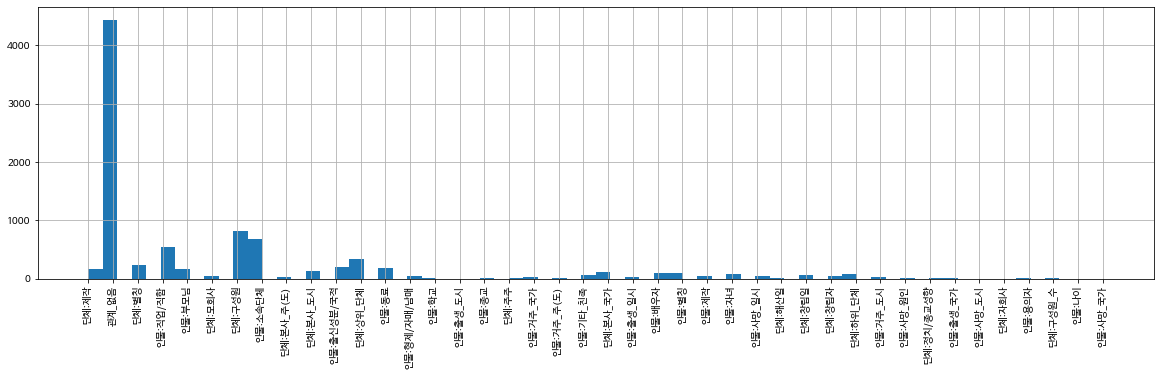

In [44]:
df['relation'].hist(xrot=90, figsize=(20, 5), bins=70)

<AxesSubplot:>

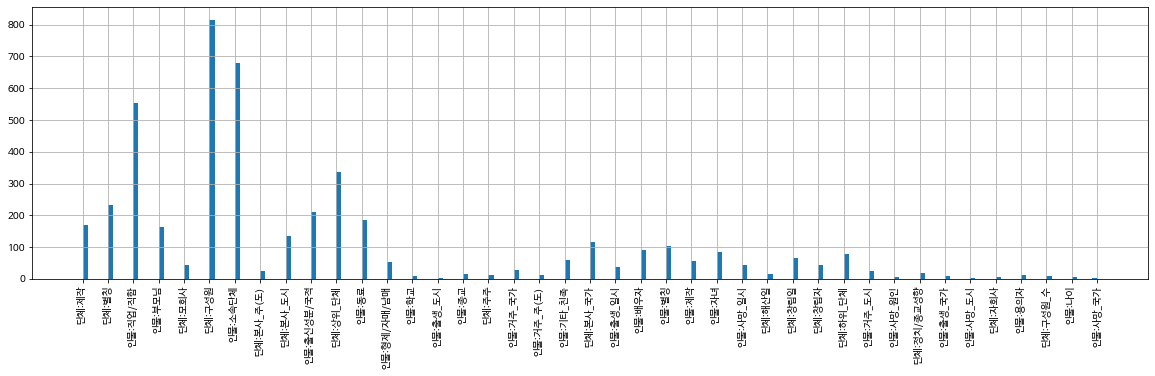

In [45]:
df[df['relation'] != "관계_없음"]['relation'].hist(xrot=90, figsize=(20, 5), bins=200)

In [46]:
df['content'].str.len().describe()

count    9000.000000
mean       99.345889
std        50.638633
min        15.000000
25%        65.000000
50%        89.000000
75%       122.000000
max       510.000000
Name: content, dtype: float64

In [61]:
import random

In [69]:
n = random.randint(0, 9000)
for i in range(10):
    print('#', df['content'][n+i])

# K3리그는 대한민국의 아마추어 축구 최상위 리그로서 출범한 축구 대회로, K3리그 어드밴스와 K3리그 베이직을 통칭하는 이름이었다.
# 그는 “중국 에너지기업인 시노펙이 180억달러 규모의 LNG를 수입한다는 방안을 제출한 상태”라며 “12월부터는 러시아산 PNG를 수입할 예정이다. 중국 정부는 미세먼지 등 환경문제로 인해 향후 석탄난방 비중을 83%에서 30%로 대폭 줄이기로 했다”고 말했다.
# 전진수 SK텔레콤 5GX서비스사업본부장은 “모바일로 롤 게임 생중계를 보는 국내외 시청자가 갈수록 늘고 있다”며 “언제 어디서든 점프 VR 앱을 통해 롤 게임 중계를 즐길 수 있을 것”이라고 밝혔다.
# 곡성군(유근기 군수) 옥과공공도서관이 여름방학을 맞아 '2019 여름 독서교실' 참가자를 오는 19일 까지 모집하고 있다.
# 2001년 양승숙 육군본부 간호병과 과장이 준장으로 진급하여 대한민국 국군 최초의 여성 장군이 된 이후, 2004년에 이재순 국군의무사령부 의료관리실 실장이 준장으로 진급하였고, 2005년에는 윤종필 국군의무사령부 의료관리실 실장이 준장으로 진급하였으며, 그 이후 여성 장군 박순화 육군 준장이 국간사 교장 직위를 퇴임하며 예편한 2009년에는 신혜경 준장이 국군간호사관학교 교장으로 취임하였다.
# 의향광주법률지원단은 사회관계망 온라인 서비스(SNS)를 통한 허위사실유포, 가짜뉴스, 명예훼손 등으로 인한 권리침해 및 정신적 피해를 입은 시민들을 대상으로 법률적 권리구제 상담 및 소송대리 등을 위해 전국 광역지자체 중 최초로 법률서비스를 제공하는 제도다.
# 그의 아들 헨리가 훗날, 1399년에 사촌동생인 리처드 2세의 왕위를 찬탈하여 헨리 4세로 잉글랜드 국왕의 자리에 오르게 된다.
# 지장보살을 비롯한 도명존자와 무독귀왕 등은 대체적으로 양호한 상태로 도금 또는 채색되었고, 그 밖의 다른 시왕상 등은 퇴색되었거나 훼손부분을 약간씩 보수한 흔적이 있다.
# '농벤져스' 백종원 씨와 양세형 씨는 진도 대파밭에 방문했고, 심각한 농가의 상황을

## Stratify Test

In [71]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [128]:
N = 20
a = np.arange(N)
b = np.random.choice(["foo","bar"], size=N)
c = np.random.choice(["y","z"], size=N)
df = pd.DataFrame({'a':a, 'b':b, 'c':c})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       20 non-null     int64 
 1   b       20 non-null     object
 2   c       20 non-null     object
dtypes: int64(1), object(2)
memory usage: 608.0+ bytes


In [126]:
train, test = train_test_split(df, test_size=0.5, stratify=df[['b']])
print(len(train))
print(len(train[train['b'] == 'bar']))
print(len(train[train['b'] == 'foo']))
print(len(test[test['b'] == 'bar']))
print(len(test[test['b'] == 'foo']))

10
6
4
6
4


In [105]:
df[['b']]

,b
0,bar
1,bar
2,foo
3,foo
4,foo
5,bar
6,bar
7,foo
8,bar
9,foo
